# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [148]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [5]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
apple = pd.read_csv(url)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [15]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [25]:
apple["Date"] = pd.to_datetime(apple["Date"], format = "%Y-%m-%d")
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [118]:
apple.set_index("Date", inplace = True)

In [31]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [37]:
# a boolean array on if there is duplicate
idx_check = apple.index.duplicated()

# check if there is True in idx_check
idx_check.any()

# no duplicate dates

False

In [38]:
#solution 2, is_unique()
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [168]:
apple = apple.sort_index()
apple.head(50)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51


### Step 9. Get the last business day of each month

In [111]:
apple.resample("BM").mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


In [68]:
apple.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03',
               '2014-07-07', '2014-07-08'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

In [62]:
#solution 2
# a range with freq = businees end day of each month
pd.date_range(start = apple.index[0], end = apple.index[-1], freq = "BM")

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')

### Step 10.  What is the difference in days between the first day and the oldest

In [130]:
time_delta = apple.index.max() - apple.index.min()
#https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html
time_delta.days

12261

### Step 11.  How many months in the data we have?

In [139]:
apple.resample("M").mean().index.size

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

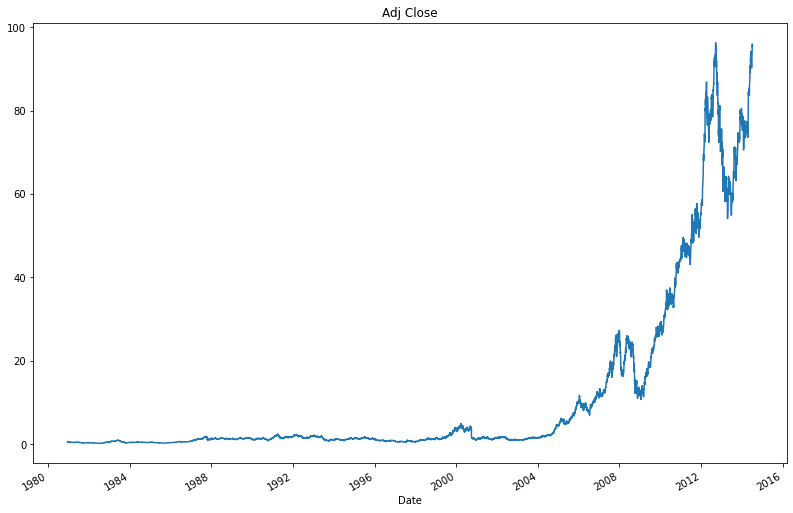

In [152]:
#plot
apple["Adj Close"].plot(title = "Adj Close")
#get current figure
figure = plt.gcf()
# set figure size
figure.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.

In [171]:
# Describe data statistics throughout all columns in year 1981
apple.loc["1981"].describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,24.386349,24.471865,24.311151,24.311151,8.131889e+06,0.378651
std,4.899738,4.905464,4.896449,4.896449,6.635420e+06,0.076370
min,14.380000,14.500000,14.250000,14.250000,1.041600e+06,0.220000
25%,19.597500,19.630000,19.500000,19.500000,4.271400e+06,0.300000
50%,24.815000,24.940000,24.750000,24.750000,6.700400e+06,0.390000
75%,28.000000,28.030000,27.910000,27.910000,9.374400e+06,0.432500
max,34.500000,34.750000,34.500000,34.500000,5.782560e+07,0.540000
